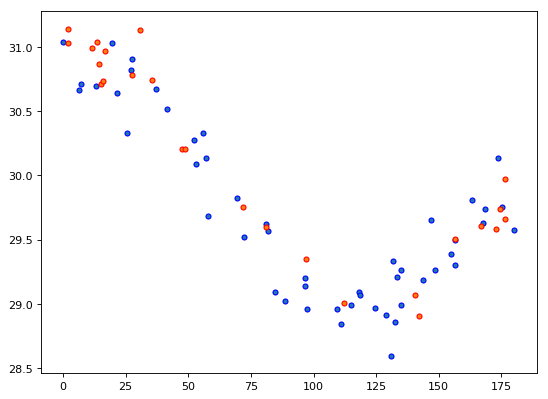

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Data generation
# train and test datas
# For example it may be "the air humidity rate from April 1st to September 30th" measured over a period of five years
def true_fun(X):
    return 30 + np.cos(1.5 * np.pi * X)

np.random.seed(102018)

n_samples_train = 50
n_samples_test = 25

X_train = np.sort(np.random.rand(n_samples_train))
y_train = true_fun(X_train) + np.random.randn(n_samples_train) * 0.2
X_test = np.sort(np.random.rand(n_samples_test))
y_test = true_fun(X_test) + np.random.randn(n_samples_test) * 0.2

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_train * 180, y_train, edgecolor='b', s=20, label="Train data")
plt.scatter(X_test * 180, y_test, edgecolor='r', s=20, label="Test data")



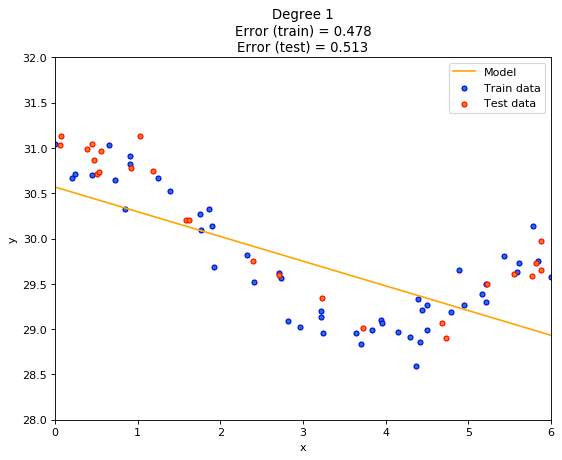

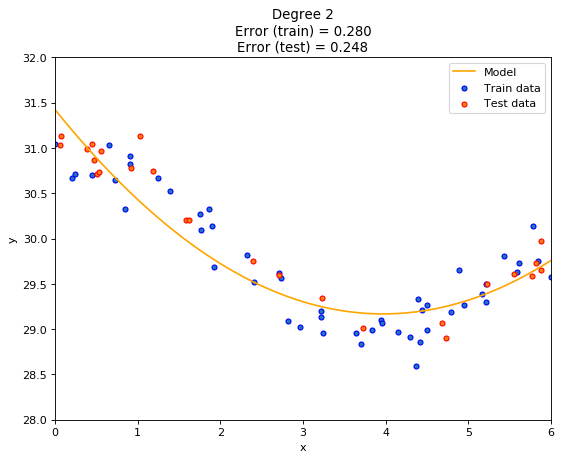

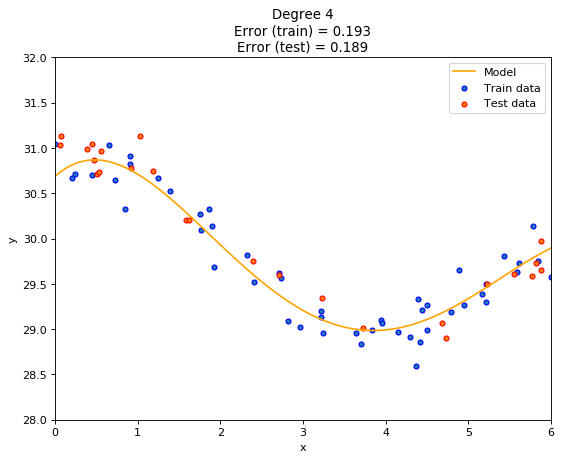

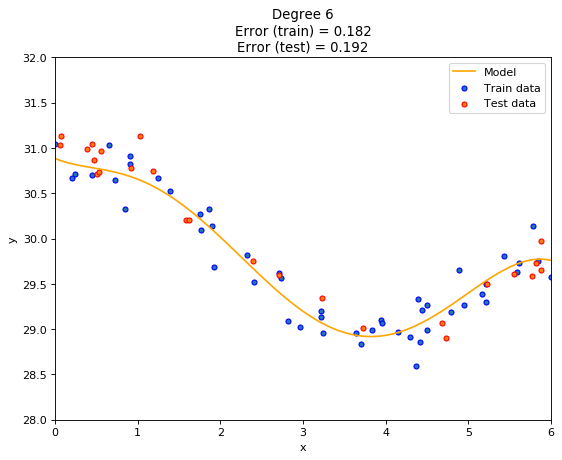

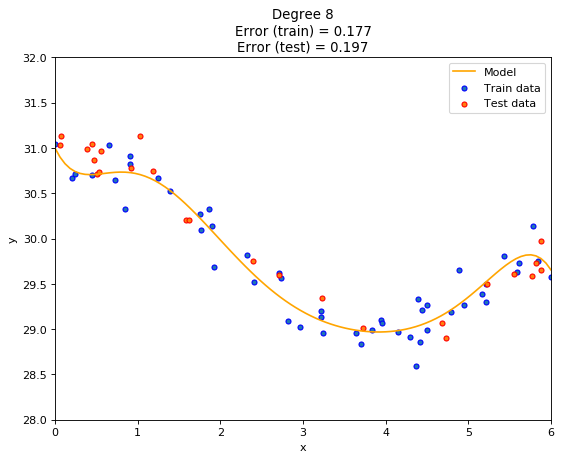

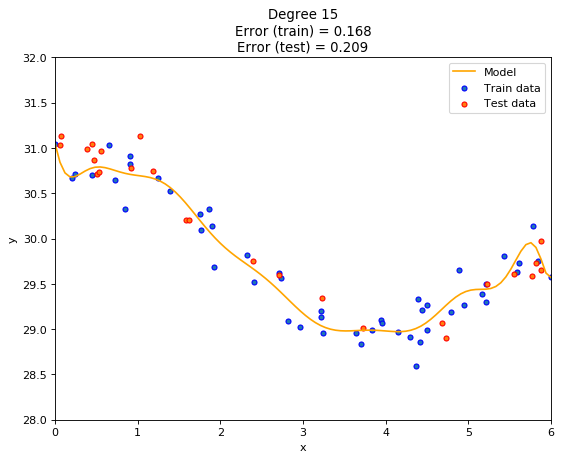

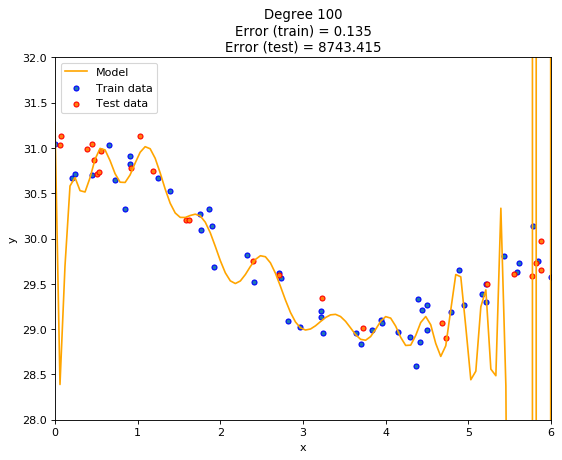

In [5]:
# Degrees selection for polynomial regression
degrees = [1, 2, 4, 6, 8, 15, 100]


for i in range(len(degrees)):

    # Regression (learning model)
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)
    
    
    # Model evaluation
    # Evaluation with train data
    y_pred_train=pipeline.predict(X_train[:, np.newaxis])
    mean_error_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

    # Evaluation with test data
    y_pred_test=pipeline.predict(X_test[:, np.newaxis])
    mean_error_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

    # output/draw results : datas, model, evaluation
    X_trace = np.linspace(0, 1, 100)
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(X_trace* 180, pipeline.predict(X_trace[:, np.newaxis]), color='orange', label="Model")
    plt.scatter(X_train* 180, y_train, edgecolor='b', s=20, label="Train data")
    plt.scatter(X_test* 180, y_test, edgecolor='r', s=20, label="Test data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 6))
    plt.ylim((28,32))
    plt.legend(loc="best")
    plt.title("Degree {}\nError (train) = {:.3f}\nError (test) = {:.3f}".format(degrees[i], mean_error_train, mean_error_test))
    plt.show()
